## Name: Nitin Kumar Singh
### #GRIP_MAY_21

### **#TASK3:** Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’.

- As a business manager, try to find out the weak areas where you can work to make more profit.
- What all business problems you can derive by exploring the data?

#### Importing Libraries

In [1]:
## importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### Loading Data

In [2]:
##loading Data

data = pd.read_csv("SampleSuperStore.csv")
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
## shape of the dataset

data.shape

(9994, 13)

#### Data Information

In [4]:
df = data.copy()

In [5]:
## checking for the datatype of each column

df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [6]:
## checking for the number of null values

df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

No, null values found.

In [7]:
## counting 0s

df[df==0].count()

Ship Mode          0
Segment            0
Country            0
City               0
State              0
Postal Code        0
Region             0
Category           0
Sub-Category       0
Sales              0
Quantity           0
Discount        4798
Profit            65
dtype: int64

Here, I'm insignificant zero values, because in some cases, null values were replaced by 0s. 

In [8]:
## checking unique values of each column

df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [9]:
## dropping country column

df.drop(['Country'], axis=1, inplace=True)

Here, I dropped Country column because it is unique through out the data, i.e., it will make no impact on our data.

#### EDA (Exploratory Data Analysis)

**Analysing the Loss**

In [10]:
## checking for rows whose profit is less than 0

temp = df[df['Profit']<0].reset_index()
temp.drop(['index'], axis=1, inplace=True)
temp

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
1,Standard Class,Home Office,Fort Worth,Texas,76106,Central,Office Supplies,Appliances,68.8100,5,0.80,-123.8580
2,Standard Class,Home Office,Fort Worth,Texas,76106,Central,Office Supplies,Binders,2.5440,3,0.80,-3.8160
3,Second Class,Consumer,Philadelphia,Pennsylvania,19140,East,Furniture,Chairs,71.3720,2,0.30,-1.0196
4,Standard Class,Consumer,Philadelphia,Pennsylvania,19140,East,Furniture,Bookcases,3083.4300,7,0.50,-1665.0522
...,...,...,...,...,...,...,...,...,...,...,...,...
1866,Standard Class,Corporate,Bryan,Texas,77803,Central,Office Supplies,Binders,22.3860,7,0.80,-35.8176
1867,Standard Class,Home Office,Akron,Ohio,44312,East,Office Supplies,Binders,5.7420,3,0.70,-4.5936
1868,Standard Class,Consumer,San Bernardino,California,92404,West,Furniture,Bookcases,683.3320,4,0.15,-40.1960
1869,Second Class,Corporate,Los Angeles,California,90049,West,Furniture,Tables,71.0880,2,0.20,-1.7772


So, there are 1871 rows which are having loss. So, as a business manager I'll first figure out how can we minimise the loss.

In [11]:
temp.groupby(['Ship Mode','Segment']).agg({'Profit': ['min', 'max','count']})

Profit              
                                  min     max count
Ship Mode      Segment                             
First Class    Consumer    -2639.9912 -0.2685   144
               Corporate    -935.9595 -0.0895    89
               Home Office -1002.7836 -0.7128    60
Same Day       Consumer     -350.4900 -0.5964    59
               Corporate   -3839.9904 -0.9452    21
               Home Office  -191.6190 -2.3232    18
Second Class   Consumer    -1862.3124 -0.3488   175
               Corporate    -734.5264 -0.7566    93
               Home Office  -339.7050 -0.6265    39
Standard Class Consumer    -6599.9780 -0.2098   625
               Corporate   -2929.4845 -0.8120   353
               Home Office -3399.9800 -0.3398   195

**Observations:**
- The Standard Class is making the highest negative profit. Let's deep dive into it, to get more information.

In [12]:
temp['Category'].value_counts()

Office Supplies    886
Furniture          714
Technology         271
Name: Category, dtype: int64

In [13]:
temp.groupby(['Category','Sub-Category']).agg({'Profit': ['min', 'max','count','sum']})

Profit                          
                                    min     max count         sum
Category        Sub-Category                                     
Furniture       Bookcases    -1665.0522 -3.8864   109 -12152.2060
                Chairs        -630.8820 -0.8999   235  -9880.8413
                Furnishings   -427.4500 -0.3398   167  -6490.9134
                Tables       -1862.3124 -0.8886   203 -32412.1483
Office Supplies Appliances   -1181.2824 -1.1100    67  -8629.6412
                Binders      -3701.8928 -0.5964   613 -38510.4964
                Fasteners      -11.8256 -0.6048    12    -33.1952
                Storage       -337.8060 -0.2098   161  -6426.3038
                Supplies     -1049.3406 -0.3488    33  -3015.6219
Technology      Accessories    -75.5958 -0.0895    91   -930.6265
                Machines     -6599.9780 -1.8295    44 -30118.6682
                Phones        -386.3916 -0.6435   136  -7530.6235

C:\Users\sacni\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Category', ylabel='Profit'>

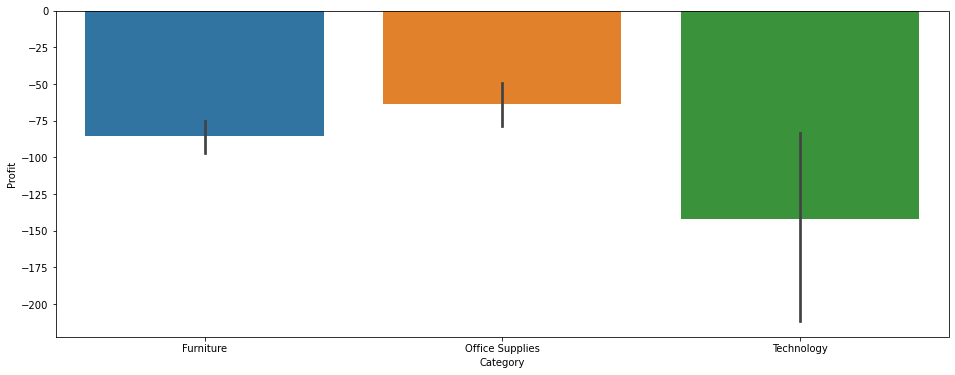

In [14]:
plt.figure(figsize=(16,6))
sns.barplot(temp['Category'],temp['Profit'])

**Obervation**:
- Items of technology is less but Loss is maximum.
- Furniture are also kind of making more loss.

C:\Users\sacni\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sub-Category', ylabel='Profit'>

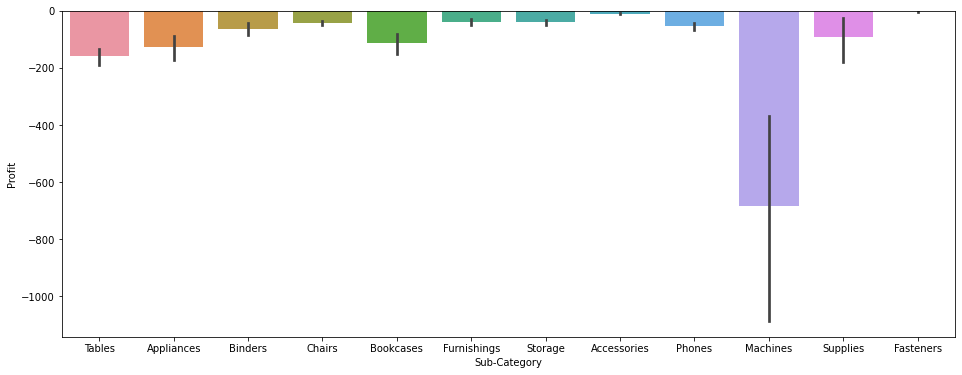

In [15]:
plt.figure(figsize=(16,6))
sns.barplot(temp['Sub-Category'],temp['Profit'])

**Observations:**
- As, compared to the numbers of other Sub-Catories, Machines are less but overall loss is maximum in this case.

C:\Users\sacni\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Quantity', ylabel='Profit'>

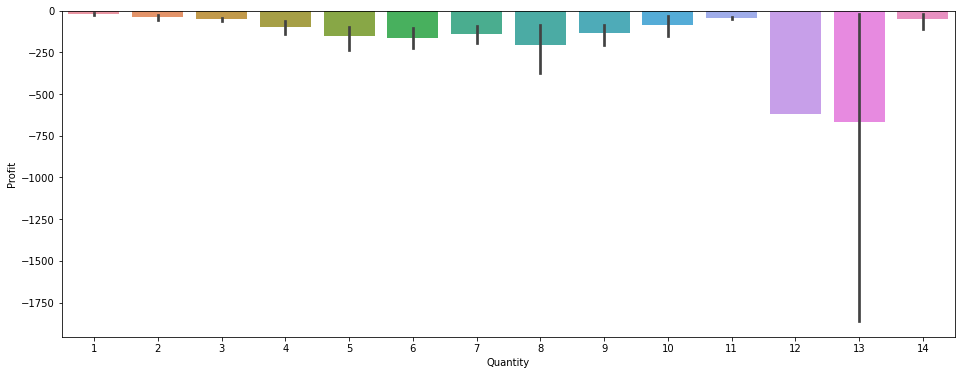

In [16]:
plt.figure(figsize=(16,6))
sns.barplot(temp['Quantity'],temp['Profit'])

**Obersvations:**
- So, there is a sudden rise in the loss at 12 and 13.

C:\Users\sacni\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Discount', ylabel='Profit'>

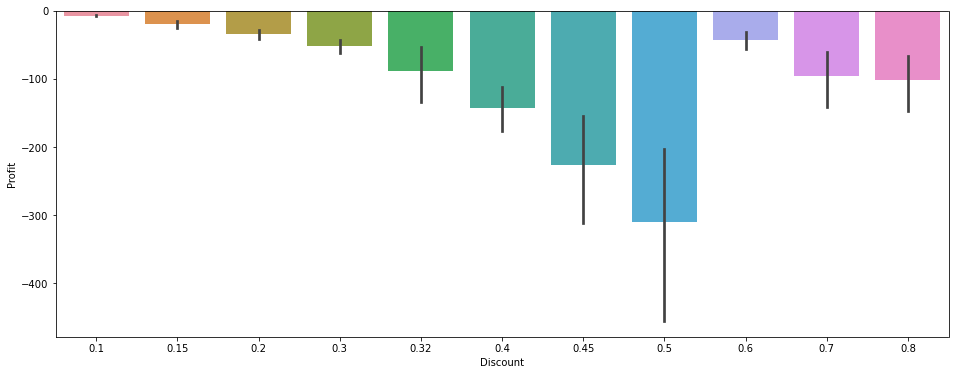

In [17]:
plt.figure(figsize=(16,6))
sns.barplot(temp['Discount'],temp['Profit'])

**Observations**:
- As the Discount increases, there is increase in the Loss till 50% discount.
- There is sudden decrease in the loss after 0.5 which might be because of other factors, like those discounts may be given on less volatile items like Office-Supplies.

**Analysing the Profit**

In [18]:
## checking for rows whose profit is less than 0

temp = df[df['Profit']>0].reset_index()
temp.drop(['index'], axis=1, inplace=True)
temp

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.960,2,0.0,41.9136
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.940,3,0.0,219.5820
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.620,2,0.0,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.368,2,0.2,2.5164
4,Standard Class,Consumer,Los Angeles,California,90032,West,Furniture,Furnishings,48.860,7,0.0,14.1694
...,...,...,...,...,...,...,...,...,...,...,...,...
8053,Second Class,Consumer,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
8054,Standard Class,Consumer,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
8055,Standard Class,Consumer,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
8056,Standard Class,Consumer,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200


In [19]:
temp.groupby(['Ship Mode','Segment']).agg({'Profit': ['min', 'max','count']})

Profit                 
                               min        max count
Ship Mode      Segment                             
First Class    Consumer     0.0792  6719.9808   620
               Corporate    0.0628  1480.4671   394
               Home Office  0.4356  3919.9888   221
Same Day       Consumer     0.2792  1371.9804   257
               Corporate    0.1472  2229.0240    93
               Home Office  0.1134   742.6320    94
Second Class   Consumer     0.1548  2799.9840   842
               Corporate    0.2016  1439.9760   513
               Home Office  0.1674  1644.2913   275
Standard Class Consumer     0.0636  5039.9856  2434
               Corporate    0.1692  8399.9760  1447
               Home Office  0.1008  2591.9568   868

**Observations:**
- Standard Class is maximun in numbers and also providing maximum profit.

In [20]:
temp['Category'].value_counts()

Office Supplies    5111
Technology         1573
Furniture          1374
Name: Category, dtype: int64

In [21]:
temp.groupby(['Category','Sub-Category']).agg({'Profit': ['min', 'max','count','sum']})

Profit                             
                                  min        max count         sum
Category        Sub-Category                                      
Furniture       Bookcases      1.1596  1013.1270   117   8679.6500
                Chairs         1.3098   770.3520   362  36471.0076
                Furnishings    0.4176   387.5676   781  19550.0570
                Tables         2.4898   629.0100   114  14686.6672
Office Supplies Appliances     0.2925   793.7160   399  26767.6466
                Art            0.1533   112.5740   796   6527.7870
                Binders        0.4704  4946.3700   910  68732.2597
                Envelopes      0.5508   204.0714   254   6964.1767
                Fasteners      0.0792    21.8880   200    982.7134
                Labels         0.6786   385.3752   364   5546.2540
                Paper          1.0700   352.2960  1370  34053.5693
                Storage        0.2034   792.2691   661  27705.1302
                Supplies       0.0628   327.5060   157   1826.5224
Technology      Accessories    0.3399   829.3754   683  42867.2622
                Copiers       59.9980  8399.9760    68  55617.8249
                Machines       3.7570  2799.9840    71  33503.4251
                Phones         0.2598  1228.1787   751  52046.3541

C:\Users\sacni\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Category', ylabel='Profit'>

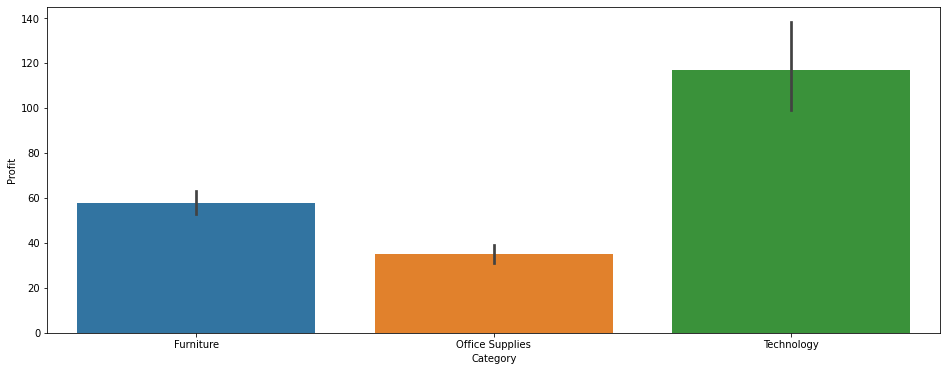

In [22]:
plt.figure(figsize=(16,6))
sns.barplot(temp['Category'],temp['Profit'])

**Obervation**:
- Items of technology is less but profit is maximum.
- Furniture are also kind of making more profit.

C:\Users\sacni\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sub-Category', ylabel='Profit'>

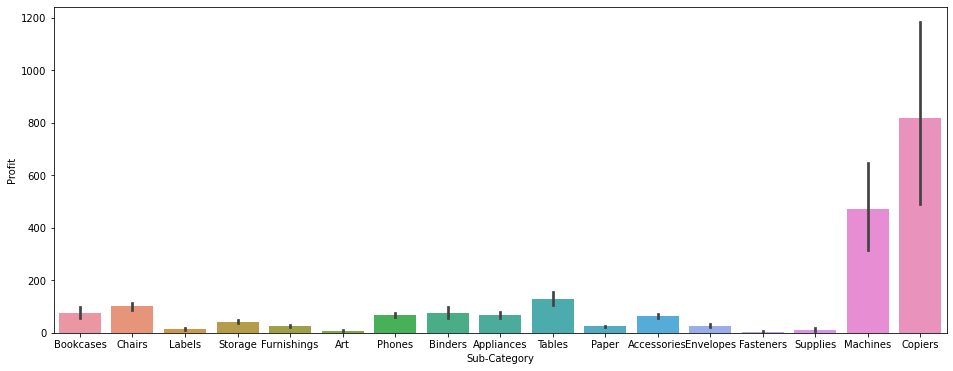

In [23]:
plt.figure(figsize=(16,6))
sns.barplot(temp['Sub-Category'],temp['Profit'])

**Obersvations:**
- Machines and Copiers are making a huge profit in comparison to the other.

C:\Users\sacni\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Quantity', ylabel='Profit'>

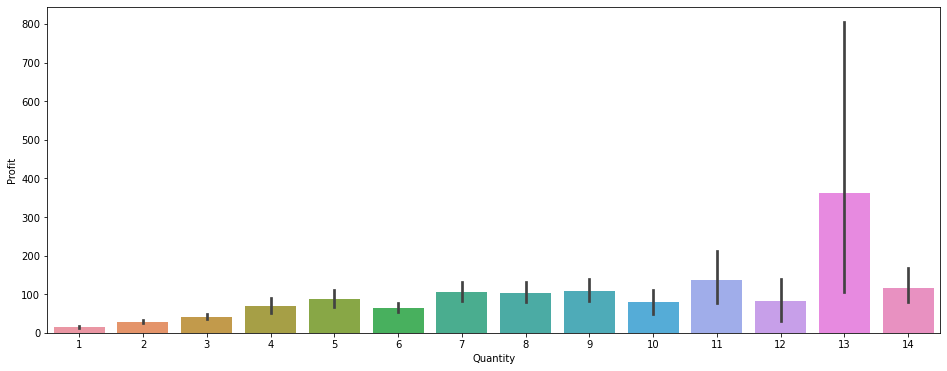

In [24]:
plt.figure(figsize=(16,6))
sns.barplot(temp['Quantity'],temp['Profit'])

**Obersvations:**
- So, there is a sudden rise in the profit at 13.

C:\Users\sacni\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Discount', ylabel='Profit'>

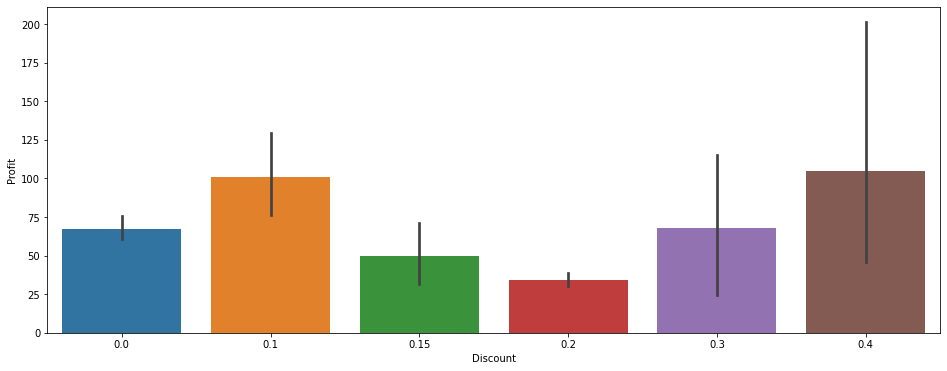

In [25]:
plt.figure(figsize=(16,6))
sns.barplot(temp['Discount'],temp['Profit'])

**Observations:**
- Less discount seems more profitable as compared to others.
- Also, sudden rise in the profit at 40% discount might be because it must be applied on a volatile item like machines or copier.

**Analysing the 0 Profit**

In [26]:
## checking for rows whose profit is less than 0

temp = df[df['Profit']==0].reset_index()
temp.drop(['index'], axis=1, inplace=True)
temp

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Standard Class,Home Office,Tampa,Florida,33614,South,Furniture,Furnishings,258.072,3,0.2,0.0
1,Second Class,Consumer,San Francisco,California,94110,West,Furniture,Chairs,1121.568,2,0.2,0.0
2,First Class,Consumer,Seattle,Washington,98105,West,Office Supplies,Fasteners,3.960,2,0.0,0.0
3,Standard Class,Corporate,Seattle,Washington,98105,West,Furniture,Chairs,451.152,3,0.2,0.0
4,Standard Class,Consumer,Philadelphia,Pennsylvania,19140,East,Furniture,Chairs,1228.465,5,0.3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
60,First Class,Consumer,Los Angeles,California,90036,West,Furniture,Chairs,2803.920,5,0.2,0.0
61,Standard Class,Corporate,Seattle,Washington,98103,West,Office Supplies,Storage,204.900,5,0.0,0.0
62,Standard Class,Consumer,Lafayette,Indiana,47905,Central,Office Supplies,Fasteners,5.940,3,0.0,0.0
63,Standard Class,Consumer,Fairfield,Ohio,45014,East,Furniture,Furnishings,82.640,2,0.2,0.0


There is very less items which not gaining any profit or loss. Only possible reason for this is because of less sales in volatile items, like machines or copiers.

In [27]:
temp.groupby(['Category','Sub-Category']).agg({'Sales': ['min', 'max','count','sum']})

Sales                           
                                  min       max count        sum
Category        Sub-Category                                    
Furniture       Bookcases     198.744   241.568     2    440.312
                Chairs         72.784  2803.920    20  15590.506
                Furnishings    31.984   508.704     9   1962.776
                Tables        446.068   557.585     2   1003.653
Office Supplies Fasteners       3.960    13.860     5     34.410
                Storage        10.560  1003.620    24   8415.198
Technology      Accessories    24.672    24.672     1     24.672
                Phones         59.970   155.350     2    215.320

**Observations**:
- Correct prediction as you can see there is no sale at all in machines.

#### Outcome of Analysis:

##### As a Business Manager I will focus on:
- Increase in sale of Machines and also have a look at the quantity and discount on the machines so I'll able minimize the loss and increase the profit.
- I'll be focusing on Stadard Class Shippment as there are relatively more client of that Class.
- Introduce more offers for Consumer Segment as they are out primary clients.
- Start a offer on purchasing Volatile items to increase its sales by providing discounts on less volatile items.